In [102]:
import numpy as np
import cv2
from skimage import io as sio
from skimage.segmentation import felzenszwalb as felseg
from skimage.segmentation import mark_boundaries
from skimage import color
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
img=cv2.imread('birds.jpg')

In order to segment this image I've chosen Felzenszwalb over segmentation method which we learned in course.I chose this method because it is fast.
By repeating this function on image using different input parameters I found that:
-scale=300 is suitable: because for bigger values segmentation would lose some birds in process and for smaller values we would have too many smaller clusters that we didn't need.
-sigma 0.8
-min_size=300 is suitable :because for each value less that 300 we would get objects that are smaller that birds segmented too,but that is not needed.

In [332]:
segments_fz = felseg(img, scale=300, sigma=0.85, min_size=300)

Now that we have the result of felzenszwalb function we'll see that there are some segmented parts(like the sea) that we want removed.So by removing values that are related to those pixels in result we can remove them.Unfortunatley I wasn't able to find a way to remove the line(that birds are on it) removed without losing any bird.
I have plotted the result in three different ways here abd the second one is the one that is saved as "res09.jpg".

In [347]:
s1=np.where(segments_fz>192,0,segments_fz)
s=np.where((s1<25) & (s1>20),0,s1)

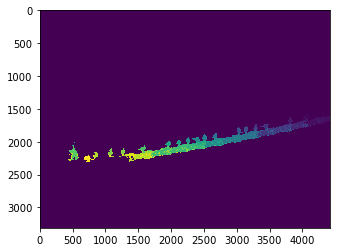

In [348]:
plt.imshow(s)
plt.show()

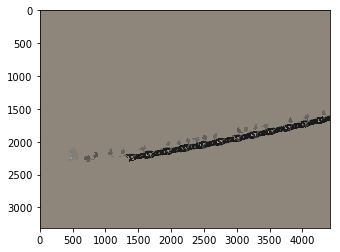

In [352]:
t=color.label2rgb(s, img, kind='avg')
plt.imshow(t)
# plt.savefig('res09.jpg')

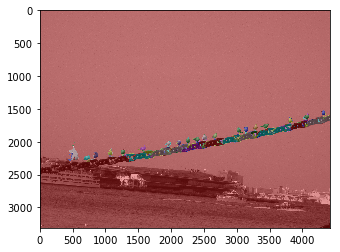

In [354]:
t2=color.label2rgb(s, img, kind='overlay')
plt.imshow(t2)